In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

#classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


#Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#Read the dataset

data = pd.read_csv("kidney_disease.csv")
data.drop(["id"], axis=1, inplace=True)
data = pd.DataFrame(data = data)

In [ ]:
data.columns = ["age", "blood_pressure", "specific_gravity", "albumin", "sugar", "red_blood_cells", "pus_cell", "pus_cell_chumps", "bacteria", "blood_glucose_random", "blood_urea", "serum_creatinine", "sodium", "potassium", "hemoglobin", "packed_cell_volume", "white_blood_cell_count", "red_blood_cell_count", "hypertension", "diabetesmellitus", "coronary_artery_disease", "appetite", "pedal_edema", "anemia", "class"]
print(data.columns)

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_chumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')


In [ ]:
#Understanding data type and summary of features

print(f"Kidney dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

Kidney dataset has 400 rows and 25 columns.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_chumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [ ]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']
print(f"categorical columns : {cat_cols}, count : {len(cat_cols)}")
print(f"numerical columns : {num_cols} count : {len(num_cols)}")

categorical columns : ['red_blood_cells', 'pus_cell', 'pus_cell_chumps', 'bacteria', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class'], count : 14
numerical columns : ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin'] count : 11


In [ ]:
for i in cat_cols:
  print(i ,":" ,data[i].unique())

red_blood_cells : [nan 'normal' 'abnormal']
pus_cell : ['normal' 'abnormal' nan]
pus_cell_chumps : ['notpresent' 'present' nan]
bacteria : ['notpresent' 'present' nan]
packed_cell_volume : ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
white_blood_cell_count : ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' 

In [ ]:
#Removing numeric columns 

cat_cols.remove("packed_cell_volume")
cat_cols.remove("white_blood_cell_count")
cat_cols.remove("red_blood_cell_count")

print(cat_cols)

#adding these columns to num_cols

num_cols.append("packed_cell_volume")
num_cols.append("white_blood_cell_count")
num_cols.append("red_blood_cell_count")

['red_blood_cells', 'pus_cell', 'pus_cell_chumps', 'bacteria', 'hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']


In [ ]:
for i in num_cols:
  print(i,":",len(data[i].unique()))

age : 77
blood_pressure : 11
specific_gravity : 6
albumin : 7
sugar : 7
blood_glucose_random : 147
blood_urea : 119
serum_creatinine : 85
sodium : 35
potassium : 41
hemoglobin : 116
packed_cell_volume : 45
white_blood_cell_count : 93
red_blood_cell_count : 50


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


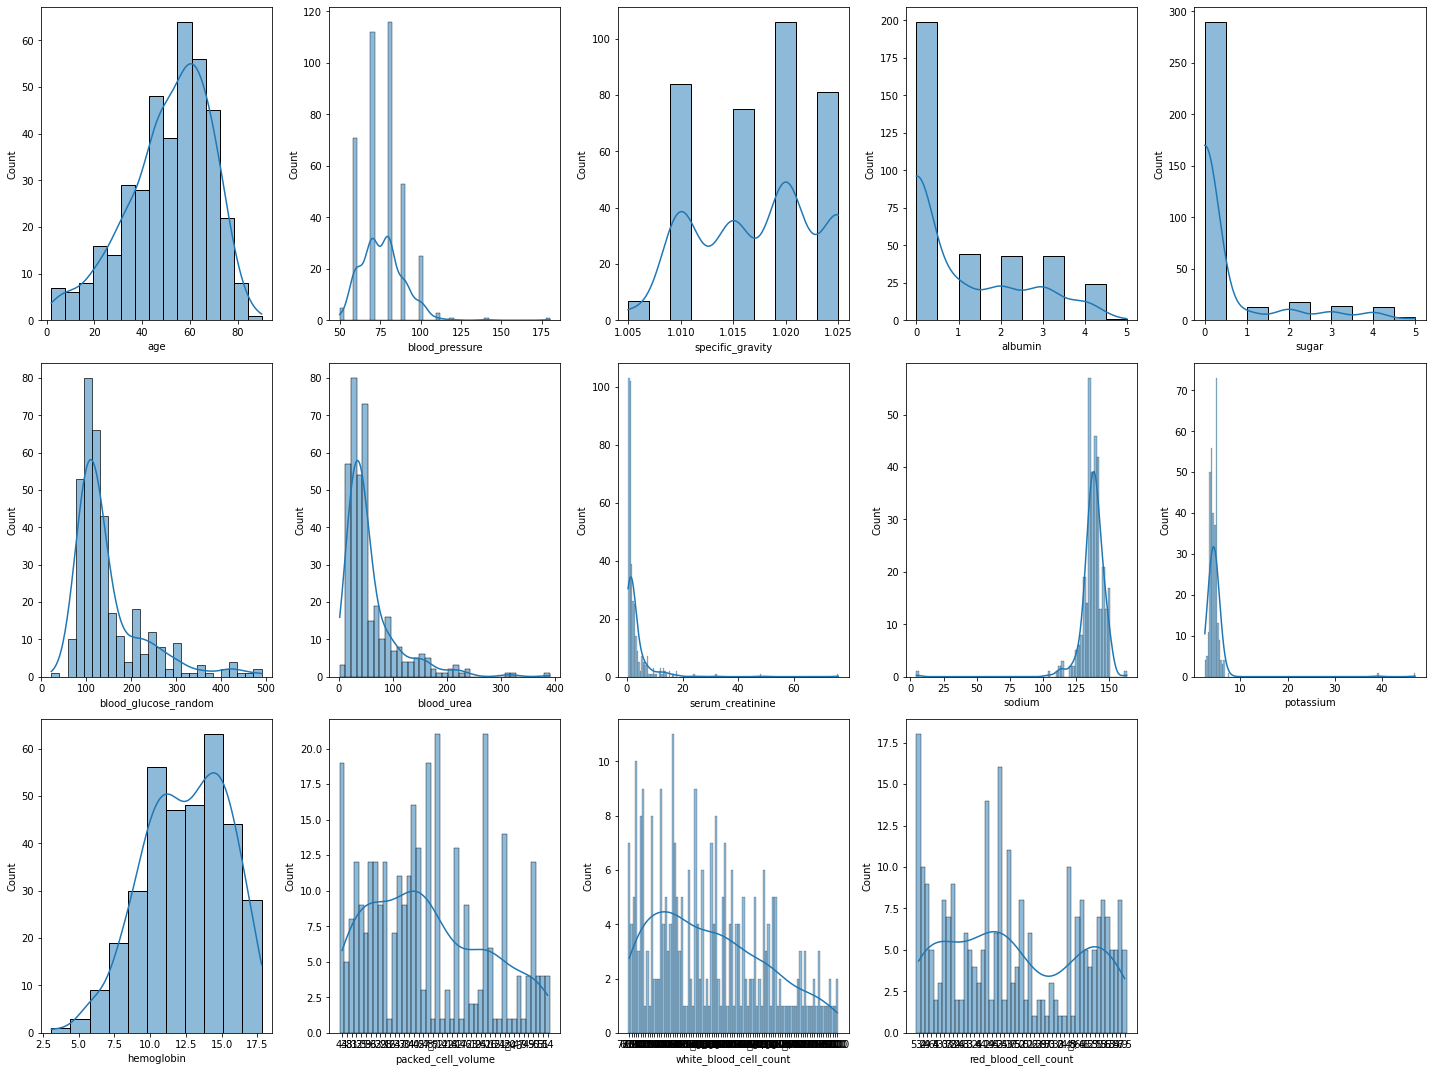

In [ ]:
#numeric column distribution
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot (data[column],kde=True)
        plt.xlabel(column)       
    plotnumber += 1

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


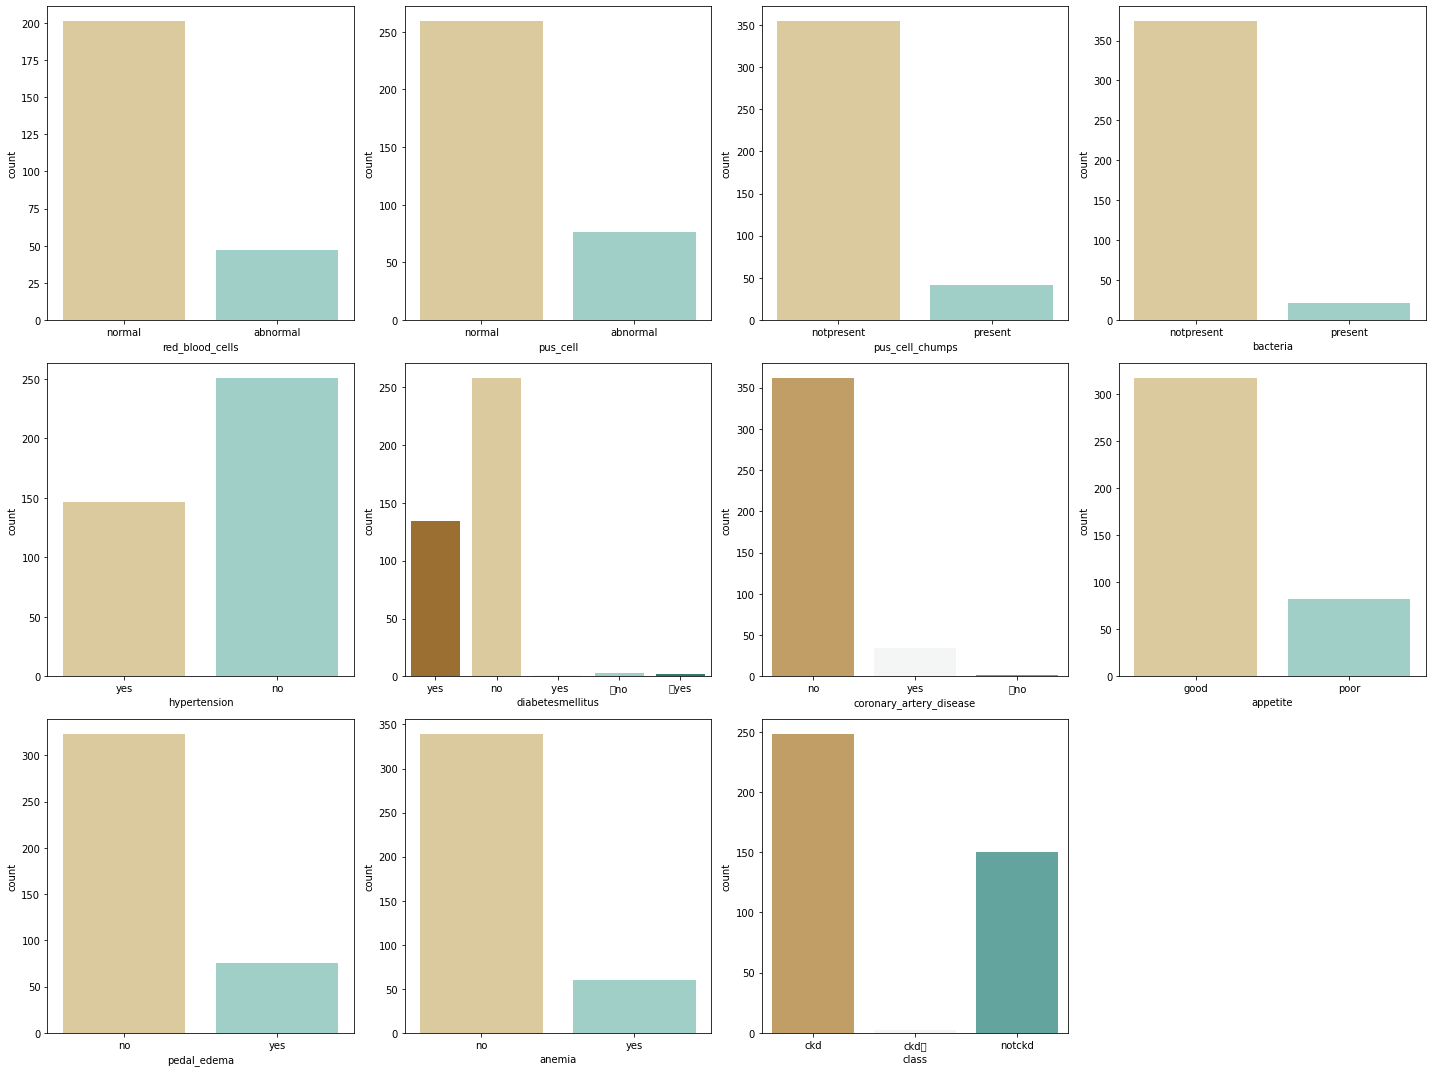

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x = data[column], palette="BrBG")
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
#replacing inconsistent values

data['class'].replace(to_replace = {'ckd\t':'ckd','notckd':'notckd','ckd':'ckd'},inplace=True)
data['diabetesmellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes'," yes" : "yes"},inplace=True)
data['coronary_artery_disease'].replace(to_replace = {'\tno':'no'},inplace=True)

In [ ]:
for i in cat_cols:
  print(i,":",data[i].unique())

red_blood_cells : [nan 'normal' 'abnormal']
pus_cell : ['normal' 'abnormal' nan]
pus_cell_chumps : ['notpresent' 'present' nan]
bacteria : ['notpresent' 'present' nan]
hypertension : ['yes' 'no' nan]
diabetesmellitus : ['yes' 'no' nan]
coronary_artery_disease : ['no' 'yes' nan]
appetite : ['good' 'poor' nan]
pedal_edema : ['no' 'yes' nan]
anemia : ['no' 'yes' nan]
class : ['ckd' 'notckd']


In [ ]:
data['red_blood_cell_count'].replace(to_replace = {None:np.nan},inplace=True)
data['white_blood_cell_count'].replace(to_replace = {"\t6200":6200,"\t?":np.nan,"\t8400":8400},inplace=True)
data['packed_cell_volume'].replace(to_replace = {"\t?":np.nan,"\t43" :43},inplace=True)

In [ ]:
cat_cols = list(set(cat_cols))
num_cols = list(set(num_cols))
print(cat_cols)
print(num_cols)

['anemia', 'class', 'coronary_artery_disease', 'appetite', 'diabetesmellitus', 'pus_cell', 'pedal_edema', 'bacteria', 'pus_cell_chumps', 'red_blood_cells', 'hypertension']
['blood_pressure', 'blood_glucose_random', 'white_blood_cell_count', 'packed_cell_volume', 'age', 'specific_gravity', 'albumin', 'sugar', 'serum_creatinine', 'potassium', 'hemoglobin', 'red_blood_cell_count', 'sodium', 'blood_urea']


In [ ]:
data["red_blood_cell_count"] = pd.to_numeric(data.red_blood_cell_count,errors="coerce")
data["packed_cell_volume"] = pd.to_numeric(data.packed_cell_volume,errors="coerce")
data["white_blood_cell_count"] = pd.to_numeric(data.white_blood_cell_count,errors="coerce")

In [ ]:
for i in num_cols:
  print(i,":",data[i].dtype)

blood_pressure : float64
blood_glucose_random : float64
white_blood_cell_count : float64
packed_cell_volume : float64
age : float64
specific_gravity : float64
albumin : float64
sugar : float64
serum_creatinine : float64
potassium : float64
hemoglobin : float64
red_blood_cell_count : float64
sodium : float64
blood_urea : float64


In [ ]:
#Handling missing values

data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_chumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [ ]:
#Handling missing values in categorical columns

for i in cat_cols:
  data[i].fillna(data[i].mode()[0], inplace=True)

In [ ]:
for i in cat_cols:
  print(i,":",data[i].unique())

anemia : ['no' 'yes']
class : ['ckd' 'notckd']
coronary_artery_disease : ['no' 'yes']
appetite : ['good' 'poor']
diabetesmellitus : ['yes' 'no']
pus_cell : ['normal' 'abnormal']
pedal_edema : ['no' 'yes']
bacteria : ['notpresent' 'present']
pus_cell_chumps : ['notpresent' 'present']
red_blood_cells : ['normal' 'abnormal']
hypertension : ['yes' 'no']


In [ ]:
#Handling missing values in numerical columns

for i in num_cols:
  data[i].fillna(data[i].median(), inplace=True)

In [ ]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_chumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [ ]:
#Label Encoding

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
for i in cat_cols:
  data[i]= label_encoder.fit_transform(data[i])

In [ ]:
for i in cat_cols:
  print(i,":",data[i].unique())

anemia : [0 1]
class : [0 1]
coronary_artery_disease : [0 1]
appetite : [0 1]
diabetesmellitus : [1 0]
pus_cell : [1 0]
pedal_edema : [0 1]
bacteria : [0 1]
pus_cell_chumps : [0 1]
red_blood_cells : [1 0]
hypertension : [1 0]


In [ ]:
#Feature selection

X = data.iloc[:,1:-1]
y = data['class']
selected_columns=[]

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=14)
rfe.fit(X, y)
for i in range(X.shape[1]):
  if rfe.support_[i]:
    selected_columns.append(data.columns[i+1])


In [ ]:
selected_columns = ['blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'hypertension',
 'diabetesmellitus',
 'coronary_artery_disease']

In [ ]:
#creating dataframe using selected columns.

new_data = data[[i for i in selected_columns]].copy()
new_data["class"] = data["class"]
new_data["age"] = data["age"]
new_data

,blood_pressure,specific_gravity,albumin,sugar,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,class,age
0,80.0,1.020,1.0,0.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,1,1,0,0,48.0
1,50.0,1.020,4.0,0.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,0,0,0,0,7.0
2,80.0,1.010,2.0,3.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,0,1,0,0,62.0
3,70.0,1.005,4.0,0.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,1,0,0,0,48.0
4,80.0,1.010,2.0,0.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,0,0,0,0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,0,0,0,1,55.0
396,70.0,1.025,0.0,0.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,0,0,0,1,42.0
397,80.0,1.020,0.0,0.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,0,0,0,1,12.0
398,60.0,1.025,0.0,0.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,0,0,0,1,17.0


In [ ]:
#splitting the dataset into dependant and independant variables

X = data.drop(["class"], axis=1)
y = new_data["class"]

In [ ]:
#spliting test train data

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
#model building

#1.LogisticRegression
ckd_LG = LogisticRegression(max_iter=2500)
ckd_LG.fit(X_train, Y_train)

#2.Supportvectormachines
ckd_svc = SVC(kernel = 'linear')
ckd_svc.fit(X_train, Y_train)

#3.GaussianNB
ckd_GN = GaussianNB()
ckd_GN.fit(X_train, Y_train)

#4.MultinomialNB
ckd_MN = MultinomialNB()
ckd_MN.fit(X_train, Y_train)

#5.SGDClassifier
ckd_SG = SGDClassifier()
ckd_SG.fit(X_train, Y_train)

#6.KNeighborsClassifier
ckd_KNN = KNeighborsClassifier(n_neighbors=5)
ckd_KNN.fit(X_train, Y_train)

#7.DecisionTreeClassifier
ckd_DT = DecisionTreeClassifier()
ckd_DT.fit(X_train, Y_train)

#8.RandomForestClassifier
ckd_RF = RandomForestClassifier()
ckd_RF.fit(X_train, Y_train)

#9.GradientBoostingClassifier
ckd_GB = GradientBoostingClassifier()
ckd_GB.fit(X_train, Y_train)

#10.LGBMClassifier
ckd_LC = LGBMClassifier()
ckd_LC.fit(X_train, Y_train)

#11.XGBClassifier
ckd_XG = XGBClassifier(max_depth = 5,  n_estimators = 150)
ckd_XG.fit(X_train, Y_train)

#12.AdaBoostClassifier
ckd_ada = AdaBoostClassifier(base_estimator = ckd_DT)
ckd_ada.fit(X_train, Y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [ ]:
accuracy = {}

#classification report for LogisticRegression

Y_pred = ckd_LG.predict(X_test)
ckd_LG_acc = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
accuracy['LogisticRegression'] = ckd_LG_acc

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

[[52  0]
 [ 1 27]]


In [ ]:
#classification report for Supportvectormachines

Y_pred = ckd_svc.predict(X_test)
ckd_svc_acc = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

accuracy['Supportvectormachines'] = ckd_svc_acc

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.93      0.96      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80

[[50  2]
 [ 1 27]]


In [ ]:
#classification report for GaussianNB

Y_pred = ckd_GB.predict(X_test)
ckd_GB_acc = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

accuracy['GaussianNB'] = ckd_GB_acc

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[52  0]
 [ 0 28]]


In [ ]:
#classification report for MultinomialNB

Y_pred = ckd_MN.predict(X_test)
ckd_MN_acc = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

accuracy['MultinomialNB'] = ckd_MN_acc

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        52
           1       0.74      1.00      0.85        28

    accuracy                           0.88        80
   macro avg       0.87      0.90      0.87        80
weighted avg       0.91      0.88      0.88        80

[[42 10]
 [ 0 28]]


In [ ]:
#classification report for SGDClassifier

Y_pred = ckd_SG.predict(X_test)
ckd_SG_acc = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

accuracy['SGDClassifier'] = ckd_SG_acc

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.35      1.00      0.52        28

    accuracy                           0.35        80
   macro avg       0.17      0.50      0.26        80
weighted avg       0.12      0.35      0.18        80

[[ 0 52]
 [ 0 28]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#classification report for KNeighborsClassifier

Y_pred = ckd_KNN.predict(X_test)
ckd_KNN_acc = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

accuracy['KNeighborsClassifier'] = ckd_KNN_acc

              precision    recall  f1-score   support

           0       0.89      0.60      0.71        52
           1       0.53      0.86      0.66        28

    accuracy                           0.69        80
   macro avg       0.71      0.73      0.69        80
weighted avg       0.76      0.69      0.69        80

[[31 21]
 [ 4 24]]


In [ ]:
#classification report for DecisionTreeClassifier

Y_pred = ckd_DT.predict(X_test)
ckd_DT_acc = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

accuracy['DecisionTreeClassifier'] = ckd_DT_acc

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

[[51  1]
 [ 0 28]]


In [ ]:
#classification report for RandomForestClassifier

Y_pred = ckd_RF.predict(X_test)
ckd_RF_acc = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

accuracy['RandomForestClassifier'] = ckd_RF_acc

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[52  0]
 [ 0 28]]


In [ ]:
#classification report for GradientBoostingClassifier

Y_pred = ckd_GB.predict(X_test)
ckd_GB_acc = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

accuracy['GradientBoostingClassifier'] = ckd_GB_acc

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[52  0]
 [ 0 28]]


In [ ]:
#classification report for LGBMClassifier

Y_pred = ckd_LC.predict(X_test)
ckd_LC_acc = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

accuracy['LGBMClassifier'] = ckd_LC_acc

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[52  0]
 [ 0 28]]


In [ ]:
#classification report for XGBClassifier

Y_pred = ckd_XG.predict(X_test)
ckd_XG_acc = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

accuracy['XGBClassifier'] = ckd_XG_acc

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

[[51  1]
 [ 0 28]]


In [ ]:
#classification report for AdaBoostClassifier

Y_pred = ckd_ada.predict(X_test)
ckd_ada_acc = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

accuracy['AdaBoostClassifier'] = ckd_ada_acc

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[52  0]
 [ 0 28]]


In [ ]:
print(accuracy)

{'LogisticRegression': 0.9875, 'Supportvectormachines': 0.9625, 'GaussianNB': 1.0, 'MultinomialNB': 0.875, 'SGDClassifier': 0.35, 'KNeighborsClassifier': 0.6875, 'DecisionTreeClassifier': 0.9875, 'RandomForestClassifier': 1.0, 'GradientBoostingClassifier': 1.0, 'LGBMClassifier': 1.0, 'XGBClassifier': 0.9875, 'AdaBoostClassifier': 1.0}


In [ ]:
accuracy = pd.DataFrame(list(accuracy.items()))

In [ ]:
#model evaluation

accuracy

,0,1
0,LogisticRegression,0.9875
1,Supportvectormachines,0.9625
2,GaussianNB,1.0000
3,MultinomialNB,0.8750
4,SGDClassifier,0.3500
5,KNeighborsClassifier,0.6875
6,DecisionTreeClassifier,0.9875
7,RandomForestClassifier,1.0000
8,GradientBoostingClassifier,1.0000
9,LGBMClassifier,1.0000


In [ ]:
''' Comparing various classification algorithms, Randomforest classifier is more reliable in predicting the results with various combination of features'''

In [ ]:
#save the model

import pickle
pickle.dump(ckd_RF, open("ckd.pkl", 'wb'))